<h1>Task-1</h1>

<h4>Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.</h4>

Sample Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('train.csv')

print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

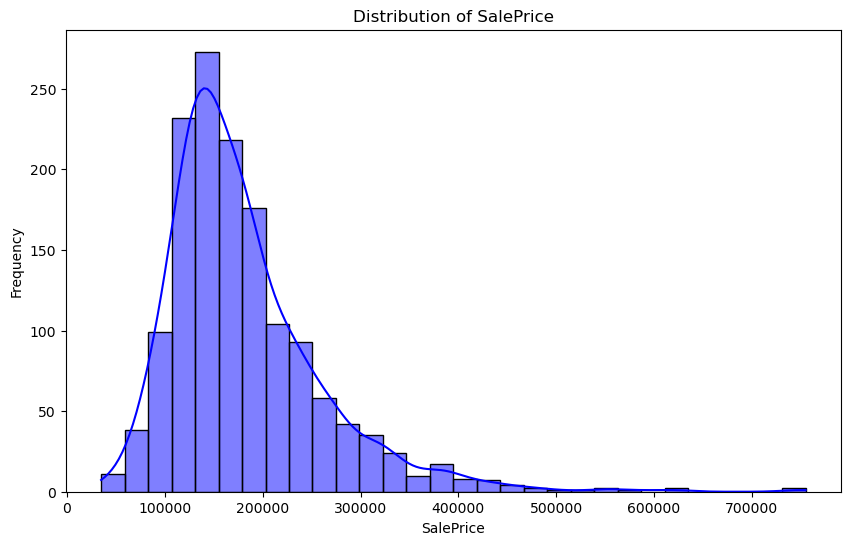

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], bins=30, kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

print(train_df['SalePrice'].describe())

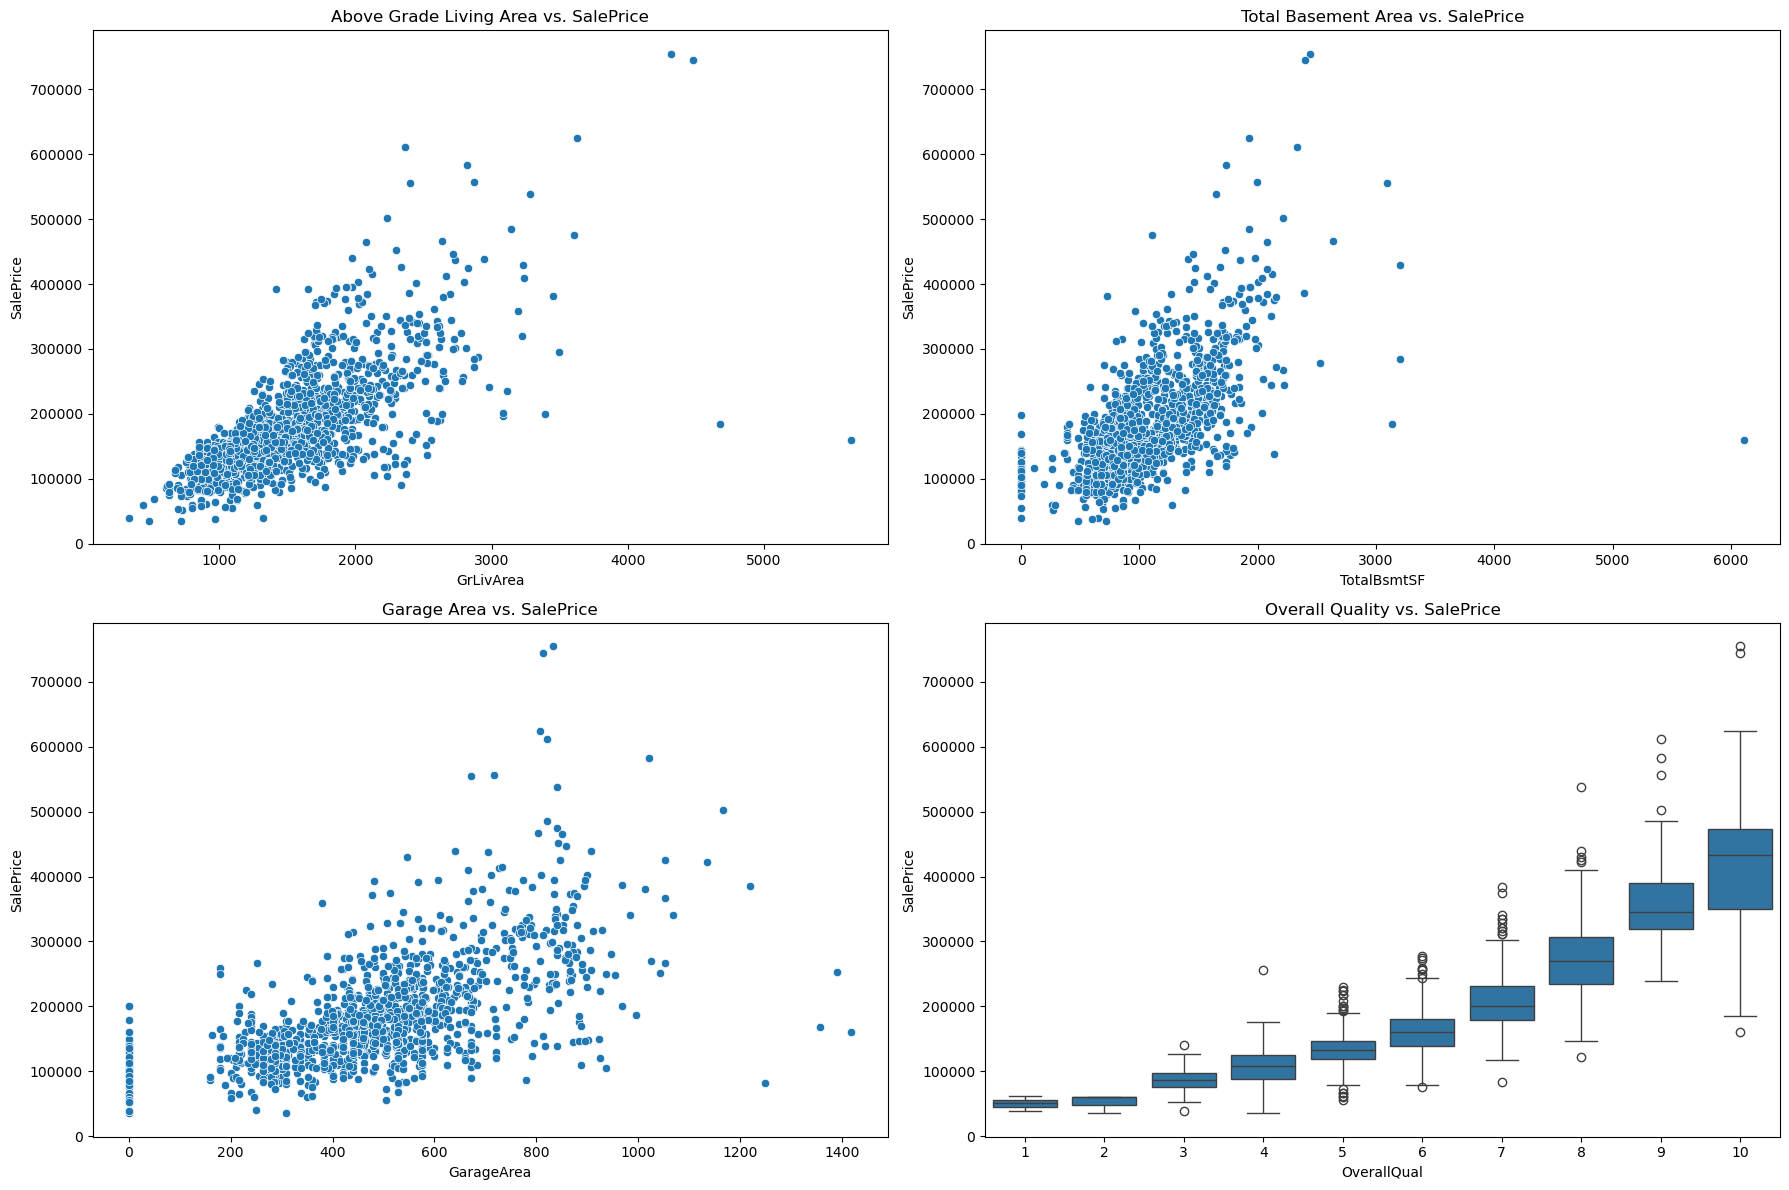

In [5]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('Above Grade Living Area vs. SalePrice')

plt.subplot(2, 2, 2)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=train_df)
plt.title('Total Basement Area vs. SalePrice')

plt.subplot(2, 2, 3)
sns.scatterplot(x='GarageArea', y='SalePrice', data=train_df)
plt.title('Garage Area vs. SalePrice')

plt.subplot(2, 2, 4)
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Overall Quality vs. SalePrice')

plt.tight_layout()
plt.show()

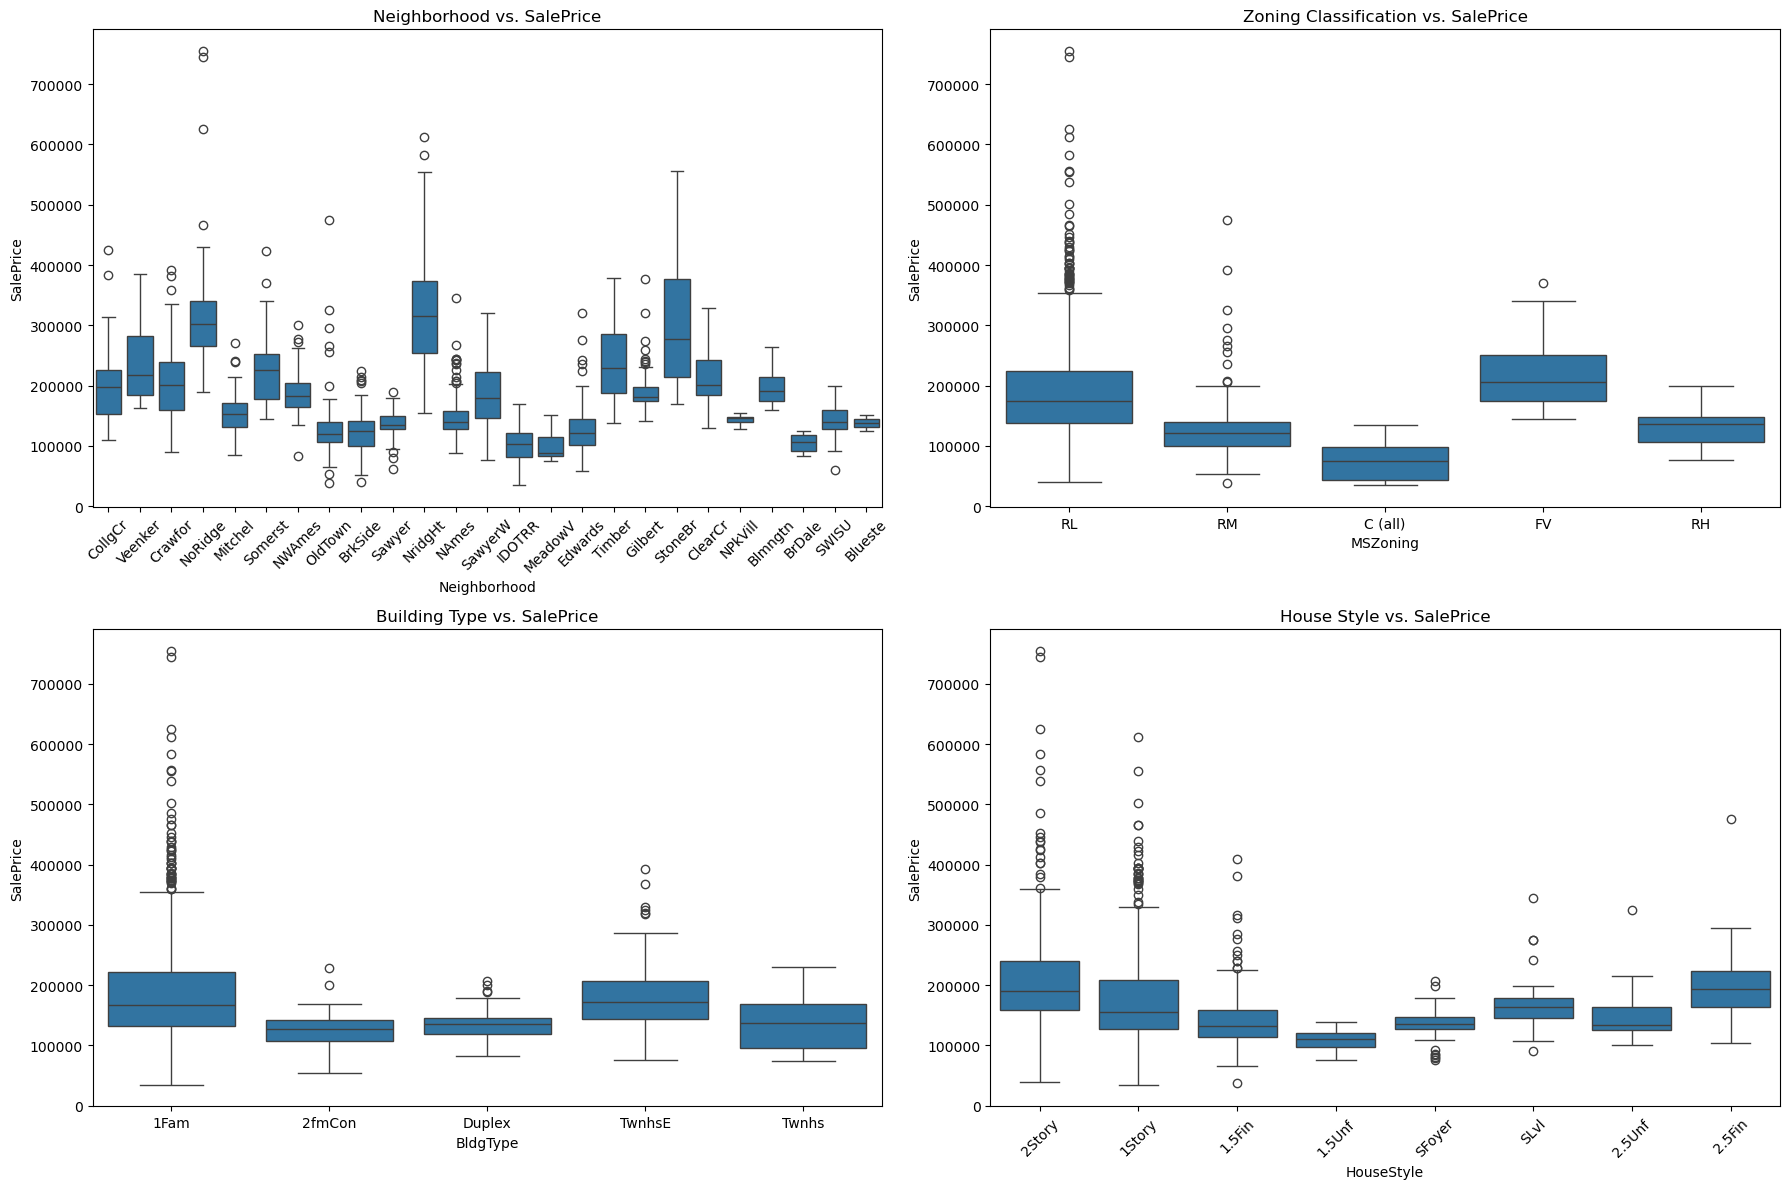

In [6]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_df)
plt.title('Neighborhood vs. SalePrice')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='MSZoning', y='SalePrice', data=train_df)
plt.title('Zoning Classification vs. SalePrice')

plt.subplot(2, 2, 3)
sns.boxplot(x='BldgType', y='SalePrice', data=train_df)
plt.title('Building Type vs. SalePrice')

plt.subplot(2, 2, 4)
sns.boxplot(x='HouseStyle', y='SalePrice', data=train_df)
plt.title('House Style vs. SalePrice')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
train_numeric = train_df[numeric_cols]

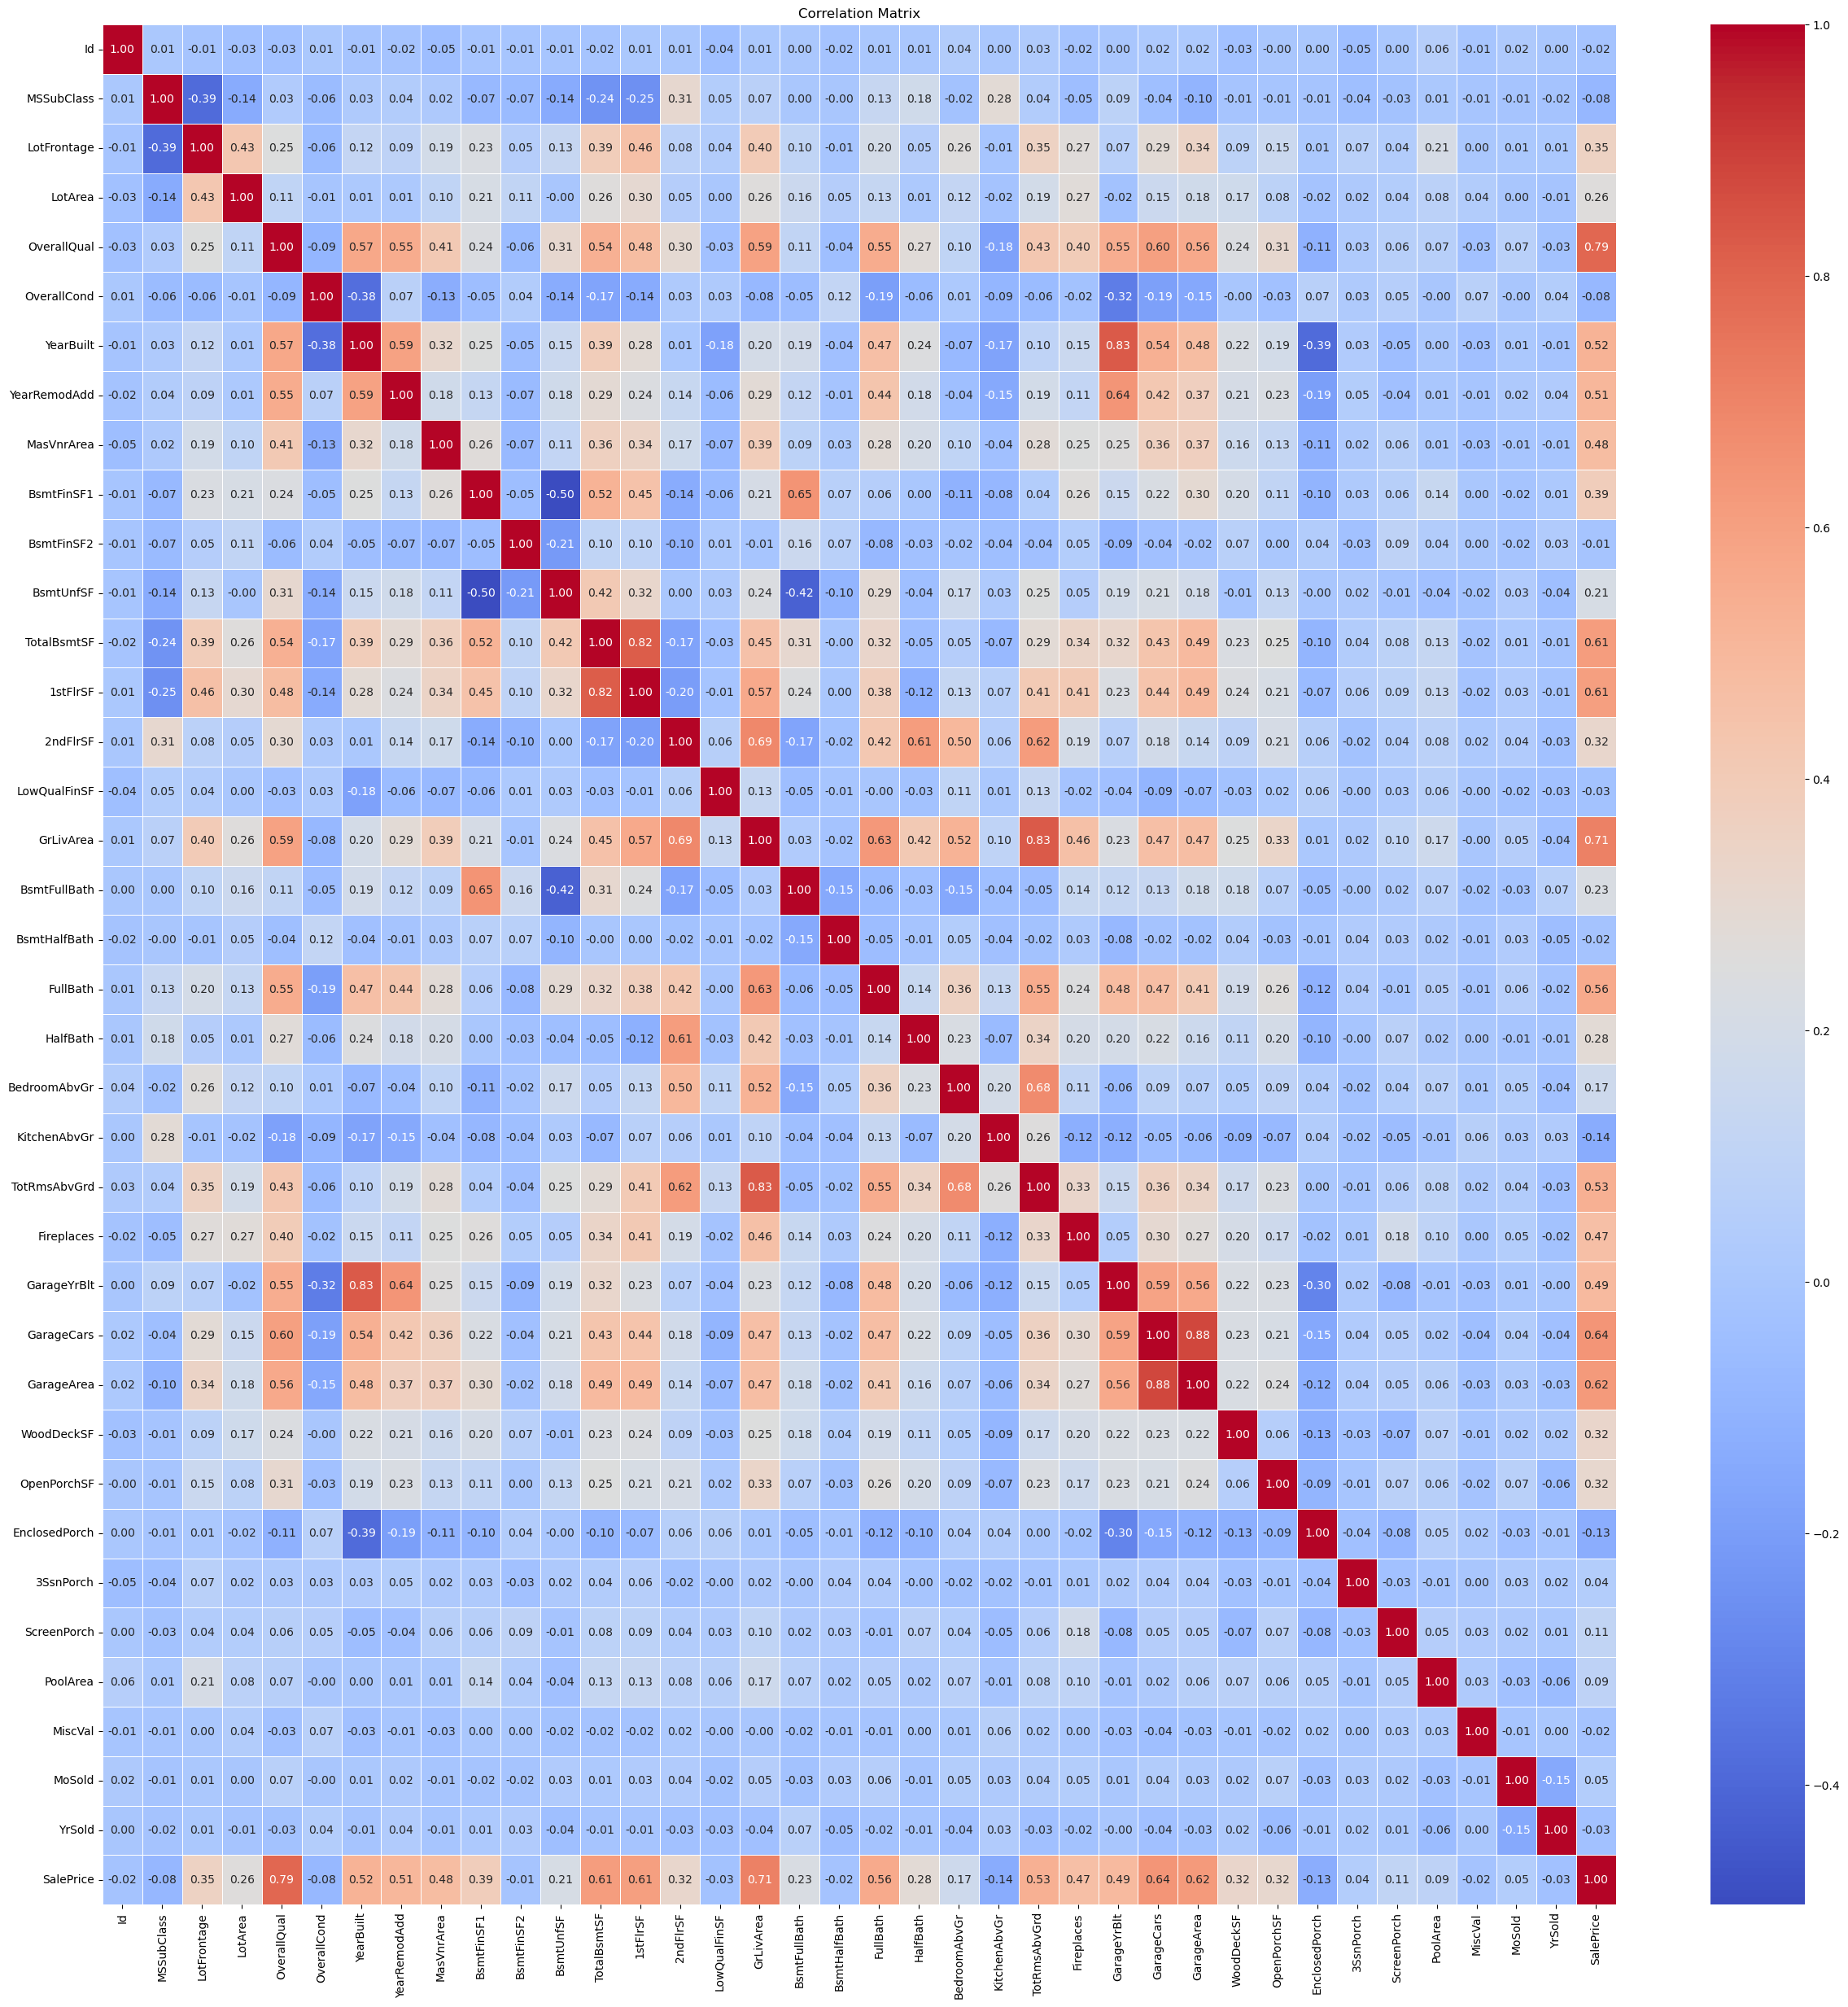

In [21]:
corr_matrix = train_numeric.corr()

plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

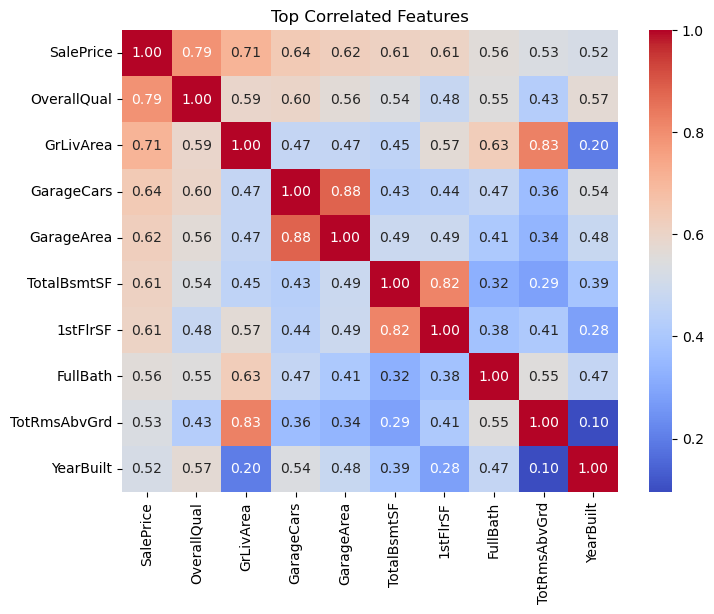

In [11]:
top_corr_features = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
top_corr_matrix = np.corrcoef(train_numeric[top_corr_features].values.T)

plt.figure(figsize=(8, 6))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', yticklabels=top_corr_features.values, xticklabels=top_corr_features.values)
plt.title('Top Correlated Features')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())
print(test_df.head())

with open('data_description.txt', 'r') as file:
    print(file.read())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [14]:
X_train = train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y_train = train_df['SalePrice']

X_test = test_df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]

In [15]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train_split, y_train_split)

LinearRegression()

In [16]:
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2806426667.247852
R-squared: 0.6341189942328374


In [17]:
y_test_pred = model.predict(X_test)

submission_df = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_test_pred})

submission_df.to_csv('submission.csv', index=False)